# Pet Adoption Prediction

The purpouse of this project is to predict the speed at which a pet is adopted, based on the data extracted from the pet’s listing on PetFinder.my (Malaysia’s leading online animal welfare platform) and available on [https://www.kaggle.com/c/petfinder-adoption-prediction/data].

The data includes text, tabular and image data for the pets. Exploratory data analysis can be used to derive relationships between the adoption speed and the various parameters available from the pet’s profile and suggest improvements to the profiles that would increase the animal’s adoptability. 
Some profiles represent a group of pets. In this case, the speed of adoption is determined by the speed at which all of the pets are adopted

## Data Fields
- PetID - Unique hash ID of pet profile
- AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
- Type - Type of animal (1 = Dog, 2 = Cat)
- Name - Name of pet (Empty if not named)
- Age - Age of pet when listed, in months
- Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
- Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
- Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
- Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
- Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
- MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- Quantity - Number of pets represented in profile
- Fee - Adoption fee (0 = Free)
- State - State location in Malaysia (Refer to StateLabels dictionary)
- RescuerID - Unique hash ID of rescuer
- VideoAmt - Total uploaded videos for this pet
- PhotoAmt - Total uploaded photos for this pet
- Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese

# Importing the Data

In [1]:
#!/usr/bin/env python
# coding: utf-8

# ## Understanding the data

# Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define files and directories
os.chdir('C:/Users/isado/Documents/SpringBoard/Capstone1/')
         
# Create DataFrame with training and testing data 
df_train = pd.read_csv('./train/train.csv')
df_test = pd.read_csv('./test/test.csv')

# Import Malaysian states demographic summary 
state_data = pd.read_csv('MalayDemographics2010.csv')

# Import breed labels decoder for petfinder data 
df_breedlabelsdogs = pd.read_csv('breed_labels_dogs.csv', index_col = 'BreedID' )

# Import breed traits data 
df_breedtraits = pd.read_csv('dogtraits.csv')
df_breedtraits.columns = df_breedtraits.columns.str.replace(' ', '')#remove spaces from column names

# Exploring Imported Data

In [2]:
# First look at imported data: select sample of 3 random rows 
df_train.sample(n=3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
1798,2,Lemonade And Kids,1,273,0,3,1,3,7,1,...,1,5,0,41401,11ccea644d2e2daf21035c46d6fe53be,0,Kittens for adoption,8ba1566de,1.0,1
11464,2,Free 2 Vaccinations,2,266,0,1,1,7,0,2,...,1,1,0,41326,dd7e4618761fb9c590572a6a95cf8df8,0,This kitten was abandoned in front of a shop 2...,ae3ff3cbc,3.0,2
13173,1,NaN,2,307,307,3,1,2,7,2,...,1,4,0,41324,59dd5e67149bb16fade497f16f091194,0,There are four puppies out there ready for ado...,146f076cf,4.0,4


In [3]:
# Print train DataFrame summary
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [4]:
# Print test DataFrame summary
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 23 columns):
Type            3972 non-null int64
Name            3561 non-null object
Age             3972 non-null int64
Breed1          3972 non-null int64
Breed2          3972 non-null int64
Gender          3972 non-null int64
Color1          3972 non-null int64
Color2          3972 non-null int64
Color3          3972 non-null int64
MaturitySize    3972 non-null int64
FurLength       3972 non-null int64
Vaccinated      3972 non-null int64
Dewormed        3972 non-null int64
Sterilized      3972 non-null int64
Health          3972 non-null int64
Quantity        3972 non-null int64
Fee             3972 non-null int64
State           3972 non-null int64
RescuerID       3972 non-null object
VideoAmt        3972 non-null int64
Description     3971 non-null object
PetID           3972 non-null object
PhotoAmt        3972 non-null float64
dtypes: float64(1), int64(18), object(4)
memory usage: 713.

In [5]:
df_train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [6]:
state_data.describe()

,"Area (1,000 km)",Total Population,Population Density,Average Annual Population Growth Rate %,Distribution of Population by State %,Urban Population %,Median Age,Dependency Ratio,Sex Ratio,Ethnic Groups Bumiputera %,Ethnic Groups Chinese %,Ethnic Groups Indians %,Ethnic Groups Others %
count,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,38918.000000,3.333428e+06,781.294118,2.729412,11.782353,70.935294,26.011765,49.370588,103.823529,72.788235,20.629412,5.788235,0.770588
std,81896.305116,6.583168e+06,1645.852468,3.905407,23.227199,18.149722,1.876793,6.424539,5.615106,17.287130,13.452823,5.172389,0.733796
min,49.000000,7.241300e+04,20.000000,1.200000,0.300000,42.400000,22.800000,36.600000,89.000000,43.600000,0.700000,0.200000,0.000000
25%,1048.000000,1.021064e+06,86.000000,1.500000,3.700000,54.000000,25.200000,46.300000,101.000000,58.900000,12.800000,0.900000,0.400000
50%,9500.000000,1.561383e+06,174.000000,1.700000,5.500000,69.700000,26.200000,48.200000,104.000000,74.800000,23.200000,6.200000,0.500000
75%,21035.000000,2.471140e+06,676.000000,2.000000,8.700000,86.500000,27.000000,53.500000,107.000000,84.800000,28.600000,10.300000,0.800000
max,330803.000000,2.833414e+07,6891.000000,17.800000,100.000000,100.000000,29.600000,61.100000,113.000000,98.000000,45.600000,15.200000,2.400000


In [7]:
#concatenate training and testing data
df_adoption_full = pd.concat([df_train, df_test], sort=False)
df_adoption_full.tail(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
3969,2,NaN,5,300,0,3,1,2,4,2,...,1,6,0,41401,30aa45fdbe45e39d5614ef583b569073,0,these cat's mother was killed when they was ne...,399013029,1.0,NaN
3970,1,Smokey,24,307,0,2,5,7,0,2,...,1,1,0,41325,087903c2819a6297519c93d962b488d5,0,"smokey is good family pet. very obedient,so lo...",fd80b8c80,3.0,NaN
3971,2,NaN,1,266,0,3,1,7,0,1,...,1,6,0,41326,041876679ae0261e3ee4aefe9e66316f,0,Found abandoned with the mother at nearby shop...,493ed84ae,1.0,NaN


# Checking for missing values

In [8]:
#Function that calculates percentage of missing data
def missingData(dataframe):
    missing = False
    for item in (dataframe.isnull().sum()).iteritems():
        if item[1] > 0:
            print('Missing Data percentage for '+item[0]+' is {:2.2%}'.format((item[1]/dataframe.shape[0])) )
            missing = True
    if not missing:
        print('Found no missing values.')            

In [9]:
missingData(df_train)

Missing Data percentage for Name is 8.38%
Missing Data percentage for Description is 0.08%


In [10]:
missingData(df_test)

Missing Data percentage for Name is 10.35%
Missing Data percentage for Description is 0.03%


In [11]:
missingData(state_data)

Found no missing values.


In [12]:
missingData(df_breedtraits)

Missing Data percentage for DroolingPotential is 0.30%
Missing Data percentage for TendencyToBarkOrHowl is 0.30%


In [13]:
missingData(df_breedlabelsdogs)

Found no missing values.


## Merging PetFinder and Dog Breed Traits data

In [14]:
#creating a dataframes of dogs only
df_adoption_dogs = df_adoption_full[df_adoption_full['Type'] == 1]

# adding breed label data to the adoption data based on Breed1 and Breed2
df_adoption_breeds = pd.merge(df_adoption_dogs, df_breedlabelsdogs, how ='left', left_on='Breed1', right_on='BreedID')
df_adoption_breeds = pd.merge(df_adoption_breeds, df_breedlabelsdogs, how='left', left_on='Breed2', right_on='BreedID', suffixes=('_1', '_2'),)

In [15]:
import numpy as np
#adding traits data based on 'Breed1' then on 'Breed2'
df_adoption_traits = pd.merge(df_adoption_breeds, df_breedtraits, how='left', left_on='BreedName_1', right_on='BreedName')
df_adoption_traits = pd.merge(df_adoption_traits, df_breedtraits, how='left', left_on='BreedName_2', right_on='BreedName', suffixes=('_1', '_2'))

#remove data for which breed1 and breed2 traits are missing - uses intelligence as sample trait
df_adoption_traits = df_adoption_traits[(df_adoption_traits['Intelligence_1'].notnull()) | (df_adoption_traits['Intelligence_2'].notnull())]

In [16]:
#for dogs labelled with multiple breeds traits data will be averaged out
#if either breed1 or breed2 traits are missing they will be excluded from final traits computation
traits = ['Adaptability',
       'AdaptsWelltoApartmentLiving', 'GoodForNoviceOwners',
       'SensitivityLevel', 'ToleratesBeingAlone', 'ToleratesColdWeather',
       'ToleratesHotWeather', 'AllAroundFriendliness',
       'AffectionatewithFamily', 'IncrediblyKidFriendlyDogs',
       'DogFriendly', 'FriendlyTowardStrangers', 'HealthGrooming',
       'AmountOfShedding', 'DroolingPotential', 'EasyToGroom',
       'GeneralHealth', 'PotentialForWeightGain', 'Size',
       'Trainability', 'EasyToTrain', 'Intelligence',
       'PotentialForMouthiness', 'PreyDrive', 'TendencyToBarkOrHowl',
       'WanderlustPotential', 'ExerciseNeeds', 'EnergyLevel',
       'Intensity', 'PotentialForPlayfulness']

for trait in traits:
    #for breeds with nans the average will be set equal to existing data
    df_adoption_traits[trait+'_1'] = df_adoption_traits.apply(lambda row: row[trait+'_2'] if np.isnan(row[trait+'_1']) else row[trait+'_1'],axis=1)
    df_adoption_traits[trait+'_2'] = df_adoption_traits.apply(lambda row: row[trait+'_1'] if np.isnan(row[trait+'_2']) else row[trait+'_2'],axis=1)
    
    df_adoption_traits[trait] = (df_adoption_traits[trait+'_1'] + df_adoption_traits[trait+'_2'])/2

    #remove redundant traits columns
    df_adoption_traits.drop(columns=[trait+'_1', trait+'_2'])

In [17]:
df_adoption_traits

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,EasyToTrain,Intelligence,PotentialForMouthiness,PreyDrive,TendencyToBarkOrHowl,WanderlustPotential,ExerciseNeeds,EnergyLevel,Intensity,PotentialForPlayfulness
7,1,Max,78,218,205,1,1,7,0,2,...,3.5,4.5,4.5,4.5,3.0,3.0,3.5,3.5,3.0,4.5
13,1,Hunter,14,189,0,1,1,2,0,3,...,4.0,5.0,3.0,4.0,4.0,2.0,4.0,4.0,4.0,5.0
14,1,Benji & Kimi,4,205,218,3,2,7,0,1,...,3.5,4.5,4.5,4.5,3.0,3.0,3.5,3.5,3.0,4.5
18,1,Jack,5,128,307,1,7,0,0,2,...,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0
23,1,Blackie Duo,1,307,141,2,1,0,0,2,...,5.0,5.0,5.0,2.0,4.0,3.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,1,Bebe,36,69,0,2,2,0,0,1,...,5.0,4.0,4.0,5.0,3.0,4.0,3.0,4.0,2.0,4.0
10222,1,Logan,18,195,0,1,1,7,0,1,...,3.0,5.0,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0
10223,1,NaN,24,179,0,3,5,0,0,1,...,5.0,5.0,4.0,2.0,2.0,3.0,4.0,4.0,3.0,5.0
10227,1,Poodle Up For Adoption,16,179,0,1,2,0,0,1,...,5.0,5.0,4.0,2.0,2.0,3.0,4.0,4.0,3.0,5.0


# Data Visualization

### Description of Adoption Speeds
- 0 - Pet was adopted on the same day as it was listed.
- 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
- 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
- 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
- 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

In [22]:
#Overall distribution of adoption speeds in training set

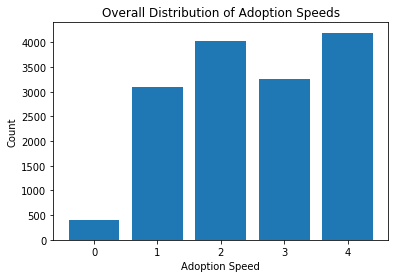

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df_train['AdoptionSpeed'], bins=[0,1,2,3,4,5] ,rwidth = 0.8, align = 'left')
plt.xticks([0,1,2,3,4])
plt.title('Overall Distribution of Adoption Speeds')
plt.ylabel('Count')
plt.xlabel('Adoption Speed')
plt.show()

In [24]:
#Is there a difference in adoption rates for cats vs dogs?

In [19]:
pd.crosstab(df_train.AdoptionSpeed, df_train.Type)#1 is Dog, 2 is Cat

Type,1,2
AdoptionSpeed,,
0,170,240
1,1435,1655
2,2164,1873
3,1949,1310
4,2414,1783


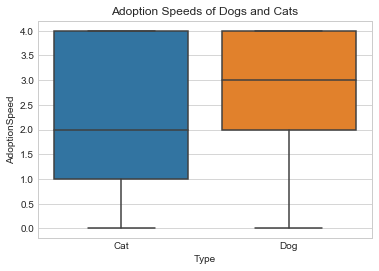

In [25]:
df_train['Type'] = df_train['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

sns.set_style("whitegrid")
sns.boxplot(x ='Type', y='AdoptionSpeed', data=df_train)
plt.title('Adoption Speeds of Dogs and Cats')
plt.show()

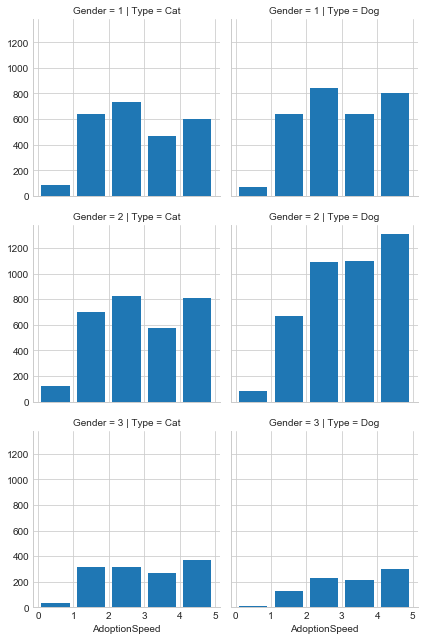

In [26]:
g = sns.FacetGrid(df_train, col="Type", row = 'Gender')
g = g.map(plt.hist, "AdoptionSpeed", bins=[0,1,2,3,4,5], rwidth = 0.8)

In [27]:
#Is there a difference in adoption rates for males vs females?

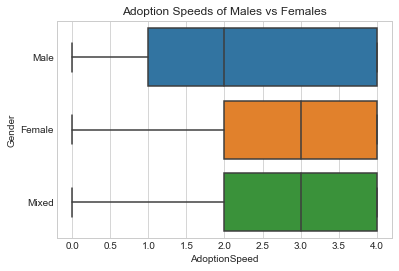

In [28]:
#Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
df_train['Gender']= df_train['Gender'].apply(lambda x: 'Male' if x == 1 else ('Female' if x ==2 else 'Mixed'))

sns.set_style("whitegrid")
sns.boxplot(x ='AdoptionSpeed', y='Gender', data=df_train, orient = 'h')
plt.title('Adoption Speeds of Males vs Females')
plt.show()


In [29]:
#Are younger pets more likely to get adopted quickly?

In [20]:
pd.crosstab(df_train.AdoptionSpeed, df_train.Age)

Age,0,1,2,3,4,5,6,7,8,9,...,132,135,144,147,156,168,180,212,238,255
AdoptionSpeed,,,,,,,,,,,,,,,,,,,,,
0,10,54,115,44,24,7,20,7,4,5,...,0,0,0,0,0,0,0,0,0,0
1,50,643,865,408,211,100,80,43,36,24,...,1,0,0,1,0,0,0,0,0,0
2,44,754,1120,586,265,157,117,59,68,51,...,1,0,1,0,1,0,0,0,0,0
3,39,511,783,458,260,135,115,62,70,31,...,3,1,1,0,0,1,1,2,0,0
4,36,342,620,470,349,196,226,110,131,73,...,3,0,2,0,0,0,1,1,1,2


With 106 columns it might be beneficial to convert the pet's age into years. 
255 months seems pretty old at 21 years and change, but with the oldest recorded cat at 38 yo and the oldest recorded dog at 29yo, so we cannot rule it out.


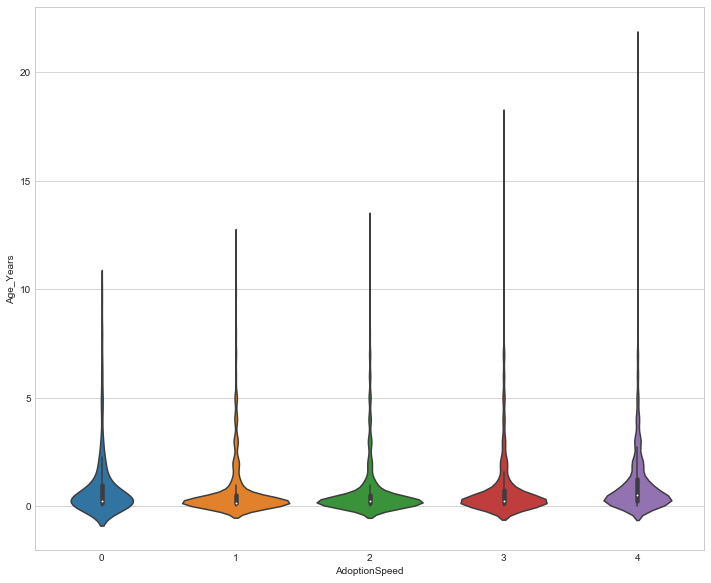

In [30]:
df_train['Age_Years']= df_train['Age']/12

fig=plt.figure(figsize=(12, 10))

sns.violinplot(x ='AdoptionSpeed', y='Age_Years', data=df_train)


In [ ]:
#How much does Health impact adoption speed?

In [21]:
pd.crosstab(df_train.AdoptionSpeed, df_train.Health)

Health,1,2,3
AdoptionSpeed,,,
0,392,17,1
1,2999,89,2
2,3925,106,6
3,3150,98,11
4,4012,171,14


In [31]:
#Is there a difference in adoption rates for different sized dogs?

In [32]:
#Are purebred animals more likely to get adopted quickly?

In [33]:
#(df_train[df_train['Type']==1 & df_train['Breed1']!= 307]['AdoptionSpeed']==4).mean()
(df_train[(df_train['Type']==1) & (df_train['Breed1']== 307)]['AdoptionSpeed']==4).mean()

nan

In [34]:
#Are breed traits correlated with higher adoption rates?

In [35]:
#Are there differences in adoption rates between the various states?

In [36]:
#What are the most popular breeds?